## Predict Customer Churn
Predict behavior to retain customers through reducing churn. I will analyze all relevant customer data and develop focused customer retention programs.

#### Data Source
[Dataset available on IBM Watson Analytics Sample Dataset > "WA_Fn UseC_ Telco Customer Churn.csv"](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)

#### Feature description: 
The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target/dependent variable. 

#### Feature list: 
customerID

gender (female, male)

SeniorCitizen (Whether the customer is a senior citizen or not (1, 0))

Partner (Whether the customer has a partner or not (Yes, No))

Dependents (Whether the customer has dependents or not (Yes, No))

tenure (Number of months the customer has stayed with the company)

PhoneService (Whether the customer has a phone service or not (Yes, No))

MultipleLines (Whether the customer has multiple lines r not (Yes, No, No phone service)

InternetService (Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity (Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup (Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection (Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport (Whether the customer has tech support or not (Yes, No, No internet service)

streamingTV (Whether the customer has streaming TV or not (Yes, No, No internet service)

streamingMovies (Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract (The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling (Whether the customer has paperless billing or not (Yes, No))

PaymentMethod (The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)))

MonthlyCharges (The amount charged to the customer monthly — numeric)

TotalCharges (The total amount charged to the customer — numeric)

Churn ( Whether the customer churned or not (Yes or No))



# Data Science Capstone Project Steps

1. Import data
2. Data wrangling 
3. Exploratory data analysis
4. Model Training
5. Model Testing
6. Inferencing
7. Data storytelling

# Step 1: Import Data

### Libraries Imported below

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline  

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
churndata = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Step 2: Data wrangling

In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### There are 11 rows with missing values, let's drop them. 

In [5]:
churndata = pd.read_csv('Telco-Customer-Churn.csv', keep_default_na=False, na_values=[' '])
churndata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churndata = churndata[churndata['TotalCharges'].notnull()]
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

### SeniorCitizen is int64, let's convert it. 

In [7]:
replacements = {
  1: 'Yes',
  0: 'No'
}
churndata['SeniorCitizen'].replace(replacements, inplace=True)
churndata.info()
churndata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null object
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(1), o

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Inspecting unique values in each column

In [8]:
for col in churndata:
    col
    churndata[col].unique()

'customerID'

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

'gender'

array(['Female', 'Male'], dtype=object)

'SeniorCitizen'

array(['No', 'Yes'], dtype=object)

'Partner'

array(['Yes', 'No'], dtype=object)

'Dependents'

array(['No', 'Yes'], dtype=object)

'tenure'

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

'PhoneService'

array(['No', 'Yes'], dtype=object)

'MultipleLines'

array(['No phone service', 'No', 'Yes'], dtype=object)

'InternetService'

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'OnlineSecurity'

array(['No', 'Yes', 'No internet service'], dtype=object)

'OnlineBackup'

array(['Yes', 'No', 'No internet service'], dtype=object)

'DeviceProtection'

array(['No', 'Yes', 'No internet service'], dtype=object)

'TechSupport'

array(['No', 'Yes', 'No internet service'], dtype=object)

'StreamingTV'

array(['No', 'Yes', 'No internet service'], dtype=object)

'StreamingMovies'

array(['No', 'Yes', 'No internet service'], dtype=object)

'Contract'

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

'PaperlessBilling'

array(['Yes', 'No'], dtype=object)

'PaymentMethod'

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

'MonthlyCharges'

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

'TotalCharges'

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

'Churn'

array(['No', 'Yes'], dtype=object)

# Step 3: Exploratory Data Analysis

### Histograms & Boxplots for continuos variables. 

'tenure'

<Figure size 432x288 with 0 Axes>

(array([1724.,  735.,  561.,  538.,  473.,  444.,  452.,  495.,  501.,
        1109.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'tenure')

'MonthlyCharges'

<Figure size 432x288 with 0 Axes>

(array([1600.,  191.,  365.,  637.,  472.,  894.,  952.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'MonthlyCharges')

'TotalCharges'

<Figure size 432x288 with 0 Axes>

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'TotalCharges')

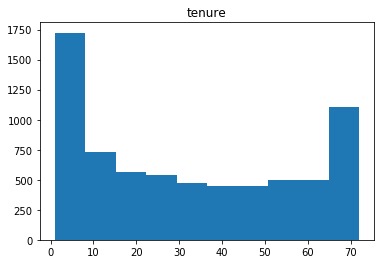

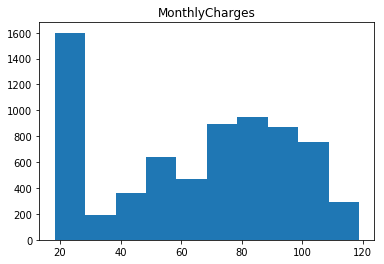

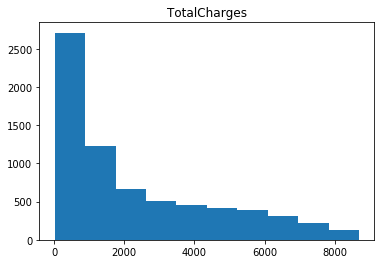

In [9]:
for col in churndata:
    if churndata[col].dtype != np.object:
        col
        plt.figure()
        plt.hist(churndata[col])
        plt.title(col)

In [10]:
churndata.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


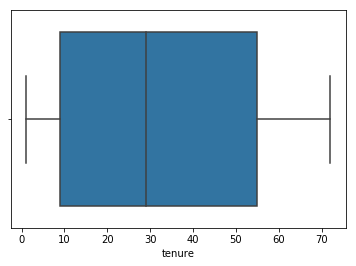

In [11]:
sns.boxplot(churndata['tenure'])

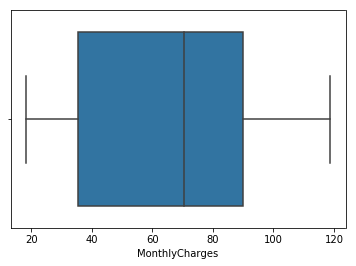

In [12]:
sns.boxplot(churndata['MonthlyCharges'])

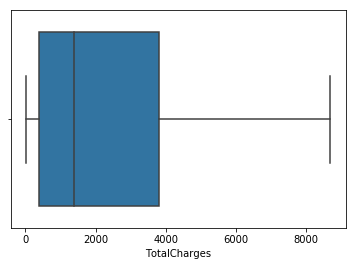

In [13]:
sns.boxplot(churndata['TotalCharges'])

### Bar plots for Discrete values

In [14]:
for col in churndata:
    if churndata[col].dtype == np.object:
        col
        #plt.figure()
        #sns.countplot(churndata[col])

'customerID'

'gender'

'SeniorCitizen'

'Partner'

'Dependents'

'PhoneService'

'MultipleLines'

'InternetService'

'OnlineSecurity'

'OnlineBackup'

'DeviceProtection'

'TechSupport'

'StreamingTV'

'StreamingMovies'

'Contract'

'PaperlessBilling'

'PaymentMethod'

'Churn'

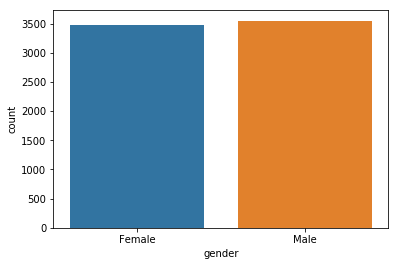

In [15]:
sns.countplot(churndata['gender'])

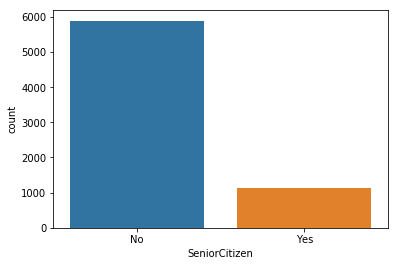

In [16]:
sns.countplot(churndata['SeniorCitizen'])

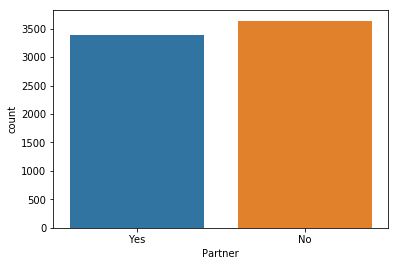

In [17]:
sns.countplot(churndata['Partner'])

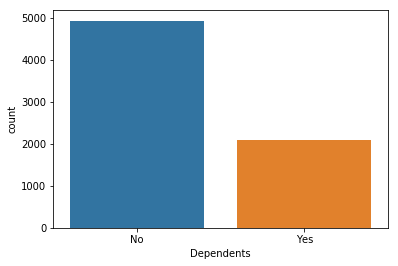

In [18]:
sns.countplot(churndata['Dependents'])

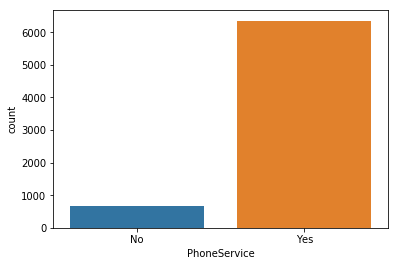

In [19]:
sns.countplot(churndata['PhoneService'])

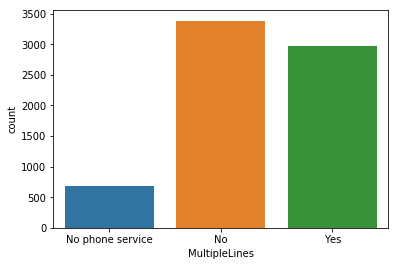

In [20]:
sns.countplot(churndata['MultipleLines'])

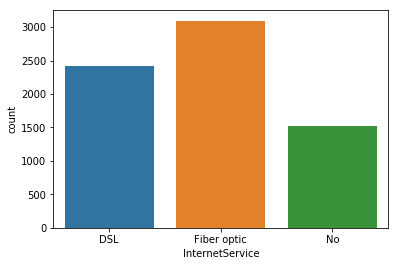

In [21]:
sns.countplot(churndata['InternetService'])

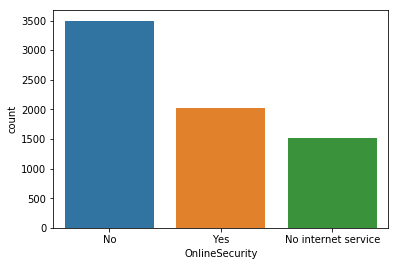

In [22]:
sns.countplot(churndata['OnlineSecurity'])

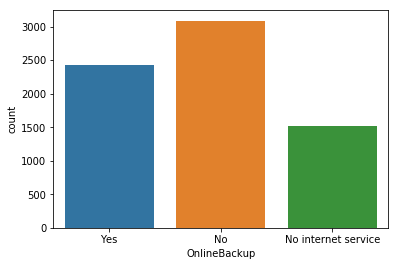

In [23]:
sns.countplot(churndata['OnlineBackup'])

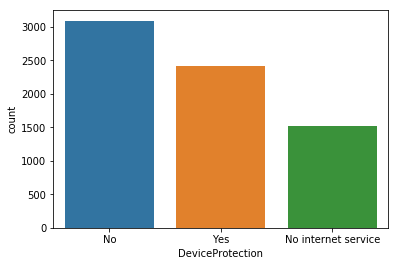

In [24]:
sns.countplot(churndata['DeviceProtection'])

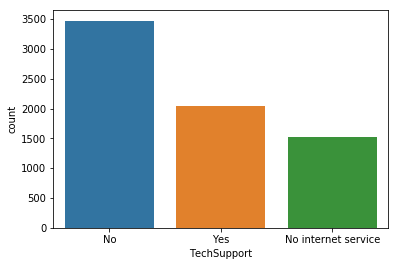

In [25]:
sns.countplot(churndata['TechSupport'])

<Figure size 432x288 with 0 Axes>

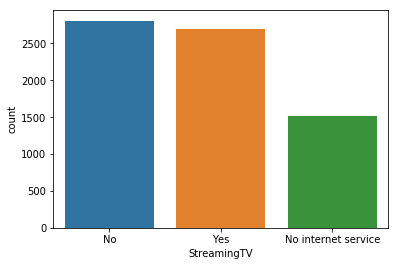

In [26]:
plt.figure()
sns.countplot(churndata['StreamingTV'])

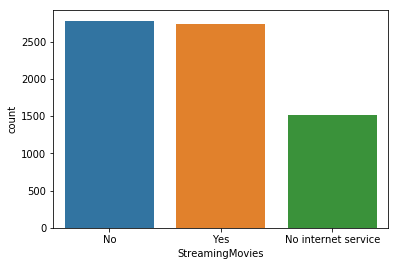

In [27]:
sns.countplot(churndata['StreamingMovies'])

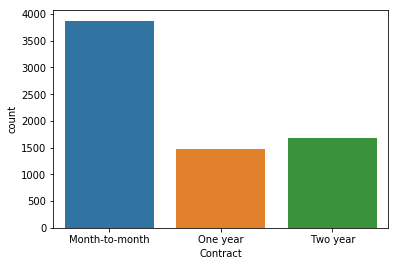

In [28]:
sns.countplot(churndata['Contract'])

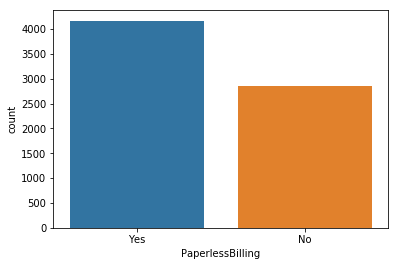

In [29]:
sns.countplot(churndata['PaperlessBilling'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

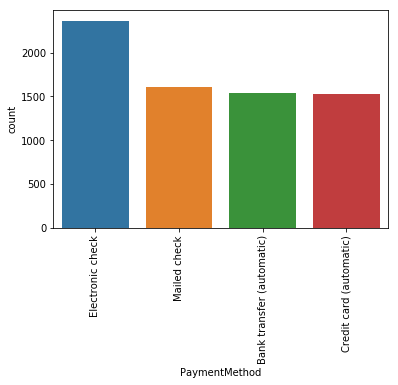

In [30]:
sns.countplot(churndata['PaymentMethod'])
plt.xticks(rotation=90)
plt.show()

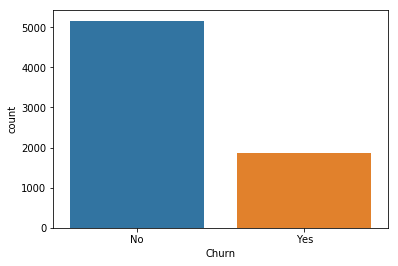

In [31]:
sns.countplot(churndata['Churn'])